### read file

In [6]:
import pandas as pd

In [7]:
df = pd.read_json('dfsNotInUseAnymore/edges.json')

In [8]:
df

,type,weight,source,target
0,ownership,0.900140,Spanish Shrimp Carriers,12744
1,partnership,0.845897,Spanish Shrimp Carriers,21323516
2,partnership,0.964876,Spanish Shrimp Carriers,290834957
3,ownership,0.964213,Spanish Shrimp Carriers,3506021
4,family_relationship,0.823486,Spanish Shrimp Carriers,Conventionâ
...,...,...,...,...
11064,family_relationship,0.817772,Ocano del Este SE,Mary Clements
11065,partnership,0.873537,Norwegian Shrimp N.V. -,67261634
11066,partnership,0.849333,Norwegian Shrimp N.V. -,344
11067,membership,0.814217,Malabar Sea Catch Sp,672


### remove dead ends

spoiler: this does not make sense because sometimes nodes are only target but they are targets of other companies and that might be interesting for too see which companies, for example, own a single company togheter

In [9]:
uniqueSources = set(df["source"].unique())
len(uniqueSources)

2320

In [10]:
uniqueTargets = set(df["target"].unique())
len(uniqueTargets)

2631

In [11]:
intersection = uniqueSources & uniqueTargets
len (intersection)

1534

In [12]:
#check if intersection is right
for inte in intersection:
    if inte not in df['source'].values and inte not in df['target'].values:
        print(inte)

In [13]:
noDeadEndDf = df[(df['source'].isin(intersection)) | (df['target'].isin(intersection))]
noDeadEndDf

,type,weight,source,target
0,ownership,0.900140,Spanish Shrimp Carriers,12744
1,partnership,0.845897,Spanish Shrimp Carriers,21323516
2,partnership,0.964876,Spanish Shrimp Carriers,290834957
3,ownership,0.964213,Spanish Shrimp Carriers,3506021
4,family_relationship,0.823486,Spanish Shrimp Carriers,Conventionâ
...,...,...,...,...
11063,family_relationship,0.870088,Ocano del Este SE,011ad1ae-ae1b-4c74-9f58-c020e6a3e836
11064,family_relationship,0.817772,Ocano del Este SE,Mary Clements
11065,partnership,0.873537,Norwegian Shrimp N.V. -,67261634
11066,partnership,0.849333,Norwegian Shrimp N.V. -,344


In [14]:
noDeadEndDf.to_json ("edgesNoDeadEnds (discarded).json", orient="records", indent=4)

### weight analysis

In [15]:
import numpy as np
# Create intervals
bins = np.arange(0, 1.05, 0.05)  # Create bins from 0 to 1, in intervals of 0.05
df['weight_interval'] = pd.cut(df['weight'], bins=bins)

# Count frequencies in each interval
frequency = df['weight_interval'].value_counts().sort_index()

In [16]:
frequency

weight_interval
(0.0, 0.05]       4
(0.05, 0.1]       3
(0.1, 0.15]       5
(0.15, 0.2]       7
(0.2, 0.25]       8
(0.25, 0.3]       7
(0.3, 0.35]       7
(0.35, 0.4]       5
(0.4, 0.45]       8
(0.45, 0.5]       5
(0.5, 0.55]       5
(0.55, 0.6]       2
(0.6, 0.65]       4
(0.65, 0.7]       8
(0.7, 0.75]       5
(0.75, 0.8]       5
(0.8, 0.85]    3938
(0.85, 0.9]    3458
(0.9, 0.95]    2483
(0.95, 1.0]    1102
Name: count, dtype: int64

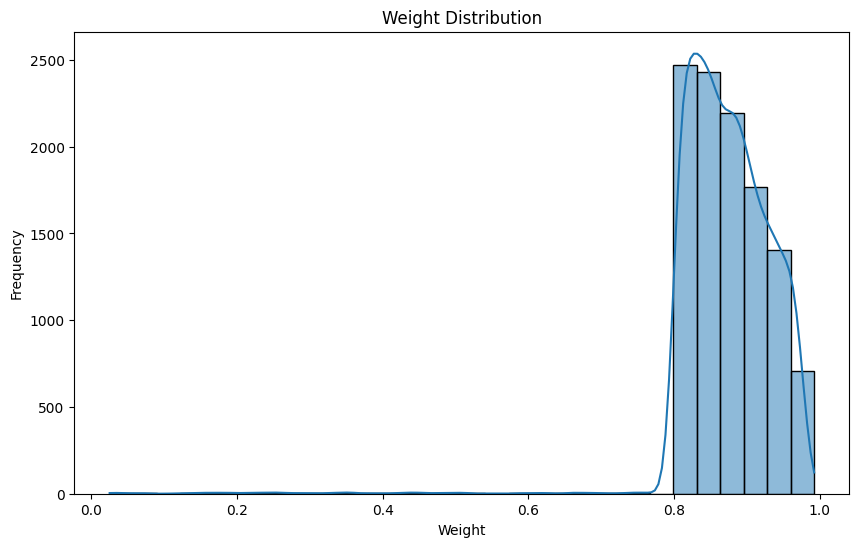

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


as one can see both in the plot and in the printed frequency the edges with a weight of less than 0.8 are in total

In [18]:
df[(df['weight'] > 0) & (df['weight'] <= 0.8)].shape[0]

88

and the number of edges between 0.8 and 1 is

In [19]:
df[(df['weight'] > 0.8)].shape[0]

10981

next idea: create a dataset with only the low weight edges and plot it

In [20]:
df[(df['weight'] <= 0.8)].to_json("edgesLowWeight (discarded).json", orient="records", indent=4)

there is not much interesting data in this plot but the file will be kept so that it is possible to plot it